In [1]:
#!pip install ipython-autotime
%load_ext autotime

time: 3.19 ms (started: 2021-05-14 08:55:00 +00:00)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout,Input, AveragePooling2D, Activation,Conv2D, MaxPooling2D, BatchNormalization,Concatenate
from keras.callbacks import EarlyStopping, TensorBoard
from sklearn.metrics import classification_report
from keras import regularizers, optimizers
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.datasets import cifar10
import os

time: 2.5 s (started: 2021-05-14 08:55:01 +00:00)


In [3]:
# Load Data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Shape of dataset
print('Shape of x_train is {}'.format(x_train.shape))
print('Shape of x_test is {}'.format(x_test.shape))
print('Shape of y_train is {}'.format(y_train.shape))
print('Shape of y_test is {}'.format(y_test.shape))

Shape of x_train is (50000, 32, 32, 3)
Shape of x_test is (10000, 32, 32, 3)
Shape of y_train is (50000, 1)
Shape of y_test is (10000, 1)
time: 790 ms (started: 2021-05-14 08:55:03 +00:00)


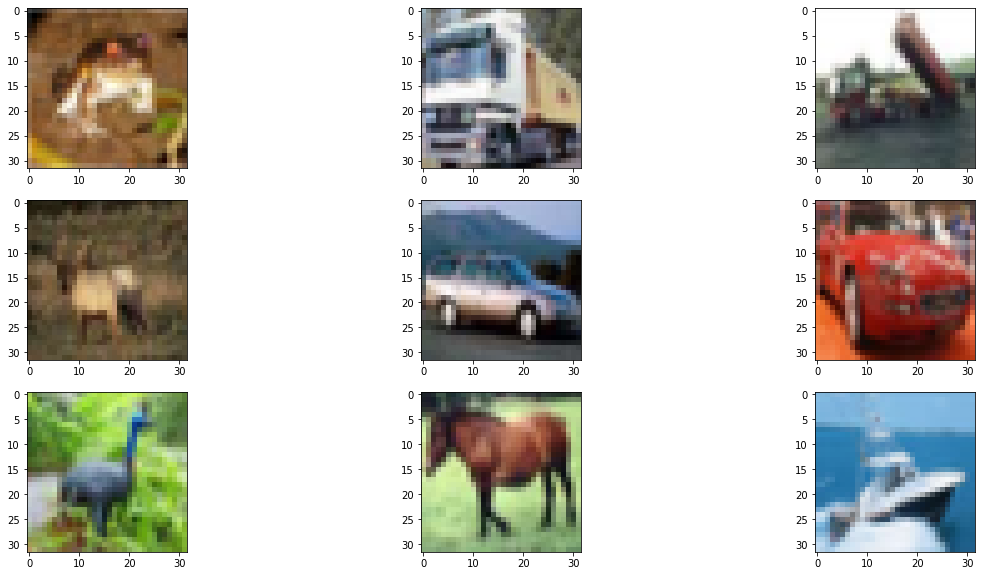

time: 1.38 s (started: 2021-05-14 08:55:04 +00:00)


In [4]:
# Sample images of dataset
plt.figure(figsize=(20,10))
for i in range(9):
  plt.subplot(330+1+i)
  plt.imshow(x_train[i])
plt.show()

In [5]:
# Normalize dataset
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
 
x_train = x_train/255.0
x_test = x_test/255.0

time: 488 ms (started: 2021-05-14 08:55:05 +00:00)


In [6]:
# One Hot Encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

time: 4.34 ms (started: 2021-05-14 08:55:06 +00:00)


In [7]:
# Train model
model = Sequential()

# Setting up layers of nodes
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [8]:
# Augmenting Image
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True, rotation_range=20)
datagen_generator = datagen.flow(x_train, y_train)

# Early Stopping to prevent overfitting
earlystopping = EarlyStopping(monitor='val_loss', patience=4)

# Reduce Learning Rate to increase efficiency by reducing learning rate when accuracy reaches a plateau
reducelr = ReduceLROnPlateau(monitor='val_accuracy', patience=2, verbose=1, factor=0.5, min_lr=0.00001)

callbacks = [earlystopping, reducelr]

# Train Model
history = model.fit(datagen_generator, epochs=50, validation_data=(x_test, y_test), callbacks=callbacks, workers=5)

Epoch 1/50
1563/1563 [==============================] - 69s 40ms/step - loss: 2.0768 - accuracy: 0.3230 - val_loss: 1.2771 - val_accuracy: 0.5430
Epoch 2/50
1563/1563 [==============================] - 62s 40ms/step - loss: 1.3113 - accuracy: 0.5319 - val_loss: 1.0859 - val_accuracy: 0.6132
Epoch 3/50
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1300 - accuracy: 0.6014 - val_loss: 1.1485 - val_accuracy: 0.6064
Epoch 4/50
1563/1563 [==============================] - 63s 40ms/step - loss: 1.0172 - accuracy: 0.6433 - val_loss: 0.9552 - val_accuracy: 0.6735
Epoch 5/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9368 - accuracy: 0.6761 - val_loss: 0.8784 - val_accuracy: 0.7021
Epoch 6/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8850 - accuracy: 0.6961 - val_loss: 0.7232 - val_accuracy: 0.7523
Epoch 7/50
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8280 - accuracy: 0.7177 - val_loss: 0.7743 -

In [9]:
pd.DataFrame(model.history.history)

,loss,accuracy,val_loss,val_accuracy,lr
0,1.725465,0.39998,1.277130,0.5430,0.001000
1,1.268646,0.54848,1.085947,0.6132,0.001000
2,1.101210,0.61296,1.148452,0.6064,0.001000
3,0.999033,0.65116,0.955227,0.6735,0.001000
4,0.927630,0.68132,0.878437,0.7021,0.001000
5,0.875424,0.69982,0.723152,0.7523,0.001000
6,0.822403,0.71864,0.774273,0.7381,0.001000
7,0.787382,0.73300,0.645443,0.7803,0.001000
8,0.757776,0.74258,0.670294,0.7716,0.001000
9,0.730143,0.75210,0.617224,0.7923,0.001000


time: 53.1 ms (started: 2021-05-14 09:29:48 +00:00)


In [10]:
# Accuracy of test data
score = model.evaluate(x_test, y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Prediction
pred = model.predict(x_test)

313/313 [==============================] - 3s 8ms/step - loss: 0.4283 - accuracy: 0.8580
Test loss: 0.4282931685447693
Test accuracy: 0.8579999804496765
time: 4.45 s (started: 2021-05-14 09:29:48 +00:00)


In [11]:
# Accuracy and Loss Visual
def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5))

    # Accuracy history
    axs[0].plot(history.history['accuracy']) 
    axs[0].plot(history.history['val_accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    axs[0].legend(['train', 'validate'], loc='best')
    
    # Loss history
    axs[1].plot(history.history['loss']) 
    axs[1].plot(history.history['val_loss']) 
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='best')
    plt.show()

time: 9.14 ms (started: 2021-05-14 09:29:53 +00:00)


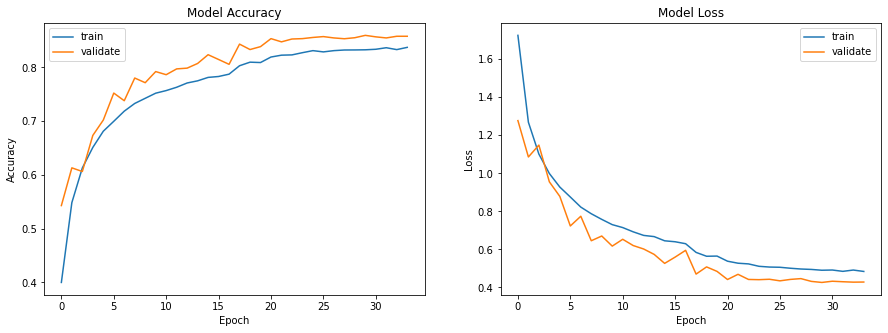

time: 371 ms (started: 2021-05-14 09:29:53 +00:00)


In [12]:
plotmodelhistory(history)

In [13]:
# Map output class
results={
   0:'aeroplane',
   1:'automobile',
   2:'bird',
   3:'cat',
   4:'deer',
   5:'dog',
   6:'frog',
   7:'horse',
   8:'ship',
   9:'truck'
}

time: 3.22 ms (started: 2021-05-14 09:29:53 +00:00)


In [14]:
# Prediction to one-hot-vectors 
Y_pred_classes = np.argmax(pred, axis=1)

# Validation to one-hot-vectors
Y_true = np.argmax(y_test, axis=1)

# Errors
errors = (Y_pred_classes - Y_true != 0)

Y_pred_classes_errors = Y_pred_classes[errors]
Y_pred_errors = pred[errors]
Y_true_errors = Y_true[errors]
X_test_errors = x_test[errors]

print(classification_report(Y_true, Y_pred_classes))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1000
           1       0.92      0.95      0.94      1000
           2       0.85      0.78      0.81      1000
           3       0.83      0.65      0.73      1000
           4       0.84      0.85      0.84      1000
           5       0.87      0.74      0.80      1000
           6       0.76      0.95      0.84      1000
           7       0.87      0.91      0.89      1000
           8       0.92      0.93      0.93      1000
           9       0.87      0.94      0.90      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

time: 42.8 ms (started: 2021-05-14 09:29:53 +00:00)


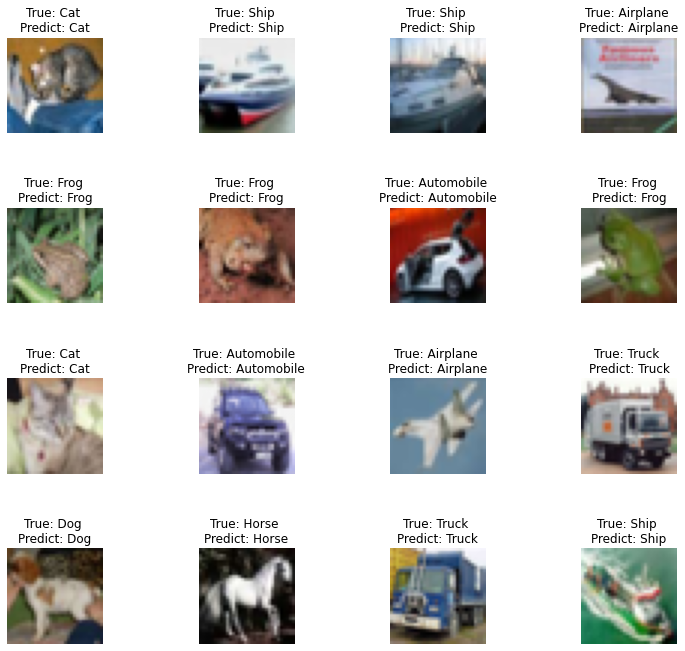

time: 834 ms (started: 2021-05-14 09:29:53 +00:00)


In [15]:
# Visual of predictions
labels = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

fig, axes = plt.subplots(4, 4, figsize=(12,12))
axes = axes.ravel()

for i in np.arange(0, 4*4):
    axes[i].imshow(x_test[i])
    axes[i].set_title("True: %s \nPredict: %s" % (labels[Y_true[i]], labels[Y_pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

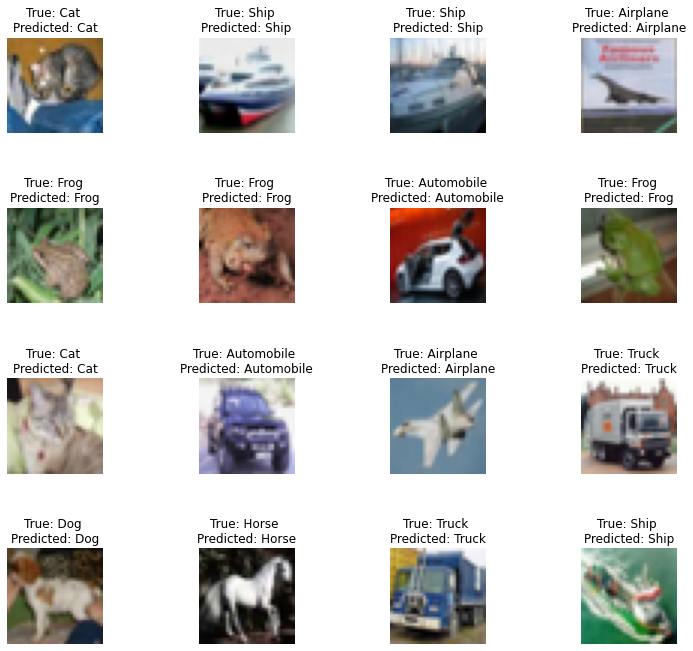

time: 1.08 s (started: 2021-05-14 09:29:54 +00:00)


In [16]:
# Visual of correct predictions
fig, axes = plt.subplots(4, 4, figsize=(12,12))
axes = axes.ravel()

classified_idx = np.where(Y_pred_classes == Y_true)[0]
for i in np.arange(0, 4*4):
    axes[i].imshow(x_test[classified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[classified_idx[i]]], labels[Y_pred_classes[classified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

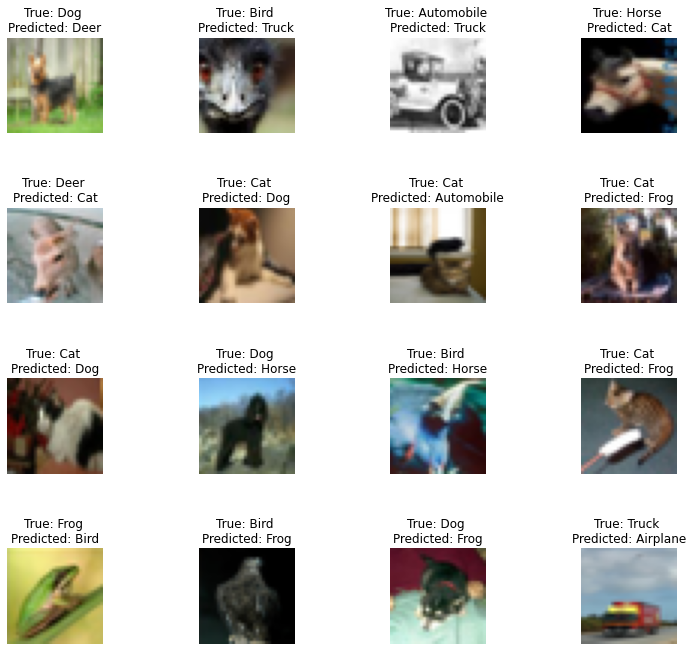

time: 906 ms (started: 2021-05-14 09:29:55 +00:00)


In [17]:
# Visual of wrong predictions
fig, axes = plt.subplots(4, 4, figsize=(12,12))
axes = axes.ravel()

misclassified_idx = np.where(Y_pred_classes != Y_true)[0]
for i in np.arange(0, 4*4):
    axes[i].imshow(x_test[misclassified_idx[i]])
    axes[i].set_title("True: %s \nPredicted: %s" % (labels[Y_true[misclassified_idx[i]]], labels[Y_pred_classes[misclassified_idx[i]]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

In [18]:
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar_model.h5'

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# Score trained model
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Saved trained model at /content/saved_models/cifar_model.h5 
313/313 [==============================] - 3s 8ms/step - loss: 0.4283 - accuracy: 0.8580
Test loss: 0.4282931685447693
Test accuracy: 0.8579999804496765
time: 2.78 s (started: 2021-05-14 09:29:56 +00:00)
